In [23]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pprint

In [2]:
img1 = cv.imread('photos/my_calib/l.jpg',0)  #queryimage # left image
img2 = cv.imread('photos/my_calib/r.jpg',0) #trainimage # right image
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
pts1 = []
pts2 = []
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [40]:
def dump(obj):
  for attr in dir(obj):
    print("obj.%s = %r" % (attr, getattr(obj, attr)))
#dump(kp1[0])
des1[1]

array([  8.,   0.,   0.,   6., 139.,   2.,   0.,   5.,  64.,   0.,   0.,
         0.,  10.,   4.,  31.,  92., 139.,   2.,   0.,   1.,  16.,  14.,
        53.,  53., 139.,   5.,   1.,   4.,  49.,   4.,   2.,   9.,  28.,
         0.,   0.,   6., 139.,   1.,   0.,   2., 139.,   9.,   1.,   3.,
        22.,   5.,   3.,  37., 139.,   7.,   2.,  10.,  82.,  15.,   3.,
        14., 139.,   6.,   1.,   6.,  85.,   8.,   1.,   6.,  20.,   1.,
         0.,   9., 139.,   0.,   0.,   0., 139.,  35.,   9.,  12.,  10.,
         0.,   0.,   1., 139.,  18.,  13.,  45.,  26.,   1.,   0.,   3.,
       139.,   2.,   0.,   0.,  54.,  12.,   1.,  10.,   1.,   0.,   0.,
         0.,   3.,   0.,   0.,   0.,   3.,   1.,   0.,   0.,   0.,   0.,
         0.,   0.,   7.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   8.,
         0.,   0.,   0.,   3.,   0.,   0.,   0.], dtype=float32)

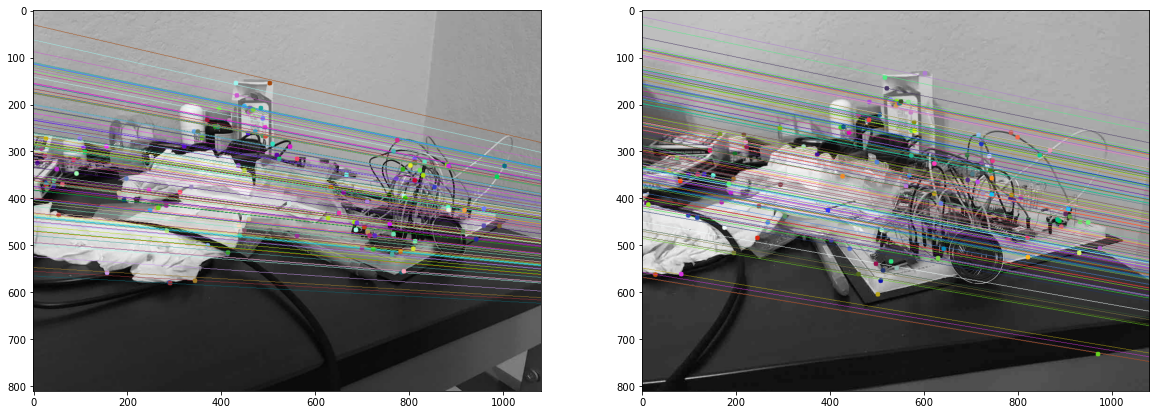

In [43]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(12)
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

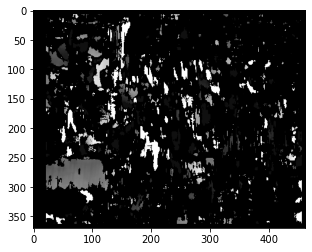

In [6]:
imgL = cv.imread('photos/epi_samples/gift_l.png',0)
imgR = cv.imread('photos/epi_samples/gift_r.png',0)
stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()

In [5]:

imgL = cv.imread("photos/epi_samples/gift_l.png",0)
imgR = cv.imread("photos/epi_samples/gift_r.png",0)

# Setting parameters for StereoSGBM algorithm

minDisparity = 0;
numDisparities = 64;
blockSize = 8;
disp12MaxDiff = 1;
uniquenessRatio = 10;
speckleWindowSize = 10;
speckleRange = 8;
# Creating an object of StereoSGBM algorithm
stereo = cv.StereoSGBM_create(minDisparity = minDisparity,
    
    numDisparities = numDisparities,
    
    blockSize = blockSize,
    
    disp12MaxDiff = disp12MaxDiff,
    
    uniquenessRatio = uniquenessRatio,
    
    speckleWindowSize = speckleWindowSize,
    
    speckleRange = speckleRange
    
    )

# Calculating disparith using the StereoSGBM algorithm
disp = stereo.compute(imgL, imgR).astype(np.float32)
disp = cv.normalize(disp,0,255,cv.NORM_MINMAX)

# Displaying the disparity map
cv.imshow("disparity",disp)
cv.waitKey(0)

32